### Judul : 
**Implementasi Text Mining dan Optimasi Algoritma K-Means pada Pengelompokkan Jenis Konten untuk Pemasaran Media Sosial (Studi Kasus Unggahan Tweet @bliblidotcom)**

### Tujuan : 
1. Mengetahui tahapan `klasterisasi` data tweet
2. Menetapkan `jumlah klaster optimal` dari `metode silhouette & elbow` 
> untuk menerapkan metode dgn hasil terbaik menggunakan `Metode Davies Bouldin Index`
3. Mengetahui `jenis konten` unggahan tweet Blibli
4. Menetapkan prioritas jenis konten yang harus difokuskan oleh Blibli berdasarkan `rata-rata jumlah retweet & like`

# 1. Text Preprocessing

In [1]:
# import library 

import pandas as pd
import re
import string
import nltk
import emoji

In [2]:
# setting display 

pd.set_option('display.max_colwidth', 1000)

In [3]:
# read data

blibli = pd.read_excel('DATA SKRIPSI BARU.xlsx')
blibli

,text,favoriteCount,created,retweetCount
0,"dengar parkseojun bicara #KarenaKamuNo1, ramah buat kuping banget gak sih.. ð¥º\n\ningat, mulai besok ada HISTERIABARENGPSJ Live Streaming dengan ParkSeojun",6799,2020-12-10 10:19:36,558
1,"Oke oke, yuk bagi-bagi Galaxy M51 Caranya:\n\n1. Follow bliblidotcom\n2. Hitung soal matematika di gambar\n3. Reply dengan hashtag #BlibliDiHatikuSelamanya #GalaxyM51xBlibli #SobatAntiLowbat & mention \n@samsungID\n4. Retweet & like tweet ini funwithblibli",541,2020-10-27 13:30:56,455
2,"Ada yang mau 1 JUTA? Nih caranya:\n\n1. Follow aku , retweet , like tweet ini\n2. Klik: https://t.co/gLLMlhNyKj FunWithBlibli",310,2020-10-20 06:13:51,278
3,"ARMY, SIAP UNTUK IKUTAN GIVEAWAY SAMSUNG GALAXY BUDS+ BTS EDITION?",272,2020-07-20 05:21:33,196
4,Ada yang mau laptop GRATIS di FunWithBlibli?\n\nCaranya:\n1. Retweet like tweet ini\n2. Sebutkan 3 keunggulan Laptop,224,2020-09-22 12:17:38,188
...,...,...,...,...
486,"Next, di EmoticonDay (Electronic Promotion Discount) ⚡️\nSmartWatch Suunto diskon hingga 500 ribu https://t.co/Th4vqmnca8",1,2020-09-18 13:30:00,0
487,"Pakai Kredivo, belanja BlibliMart lebih hemat!ð",1,2020-05-28 06:00:00,0
488,Selanjutnya di EmoticonDay (Electronic Promotion Discount) ~ ð¸ð¡ðµ\n\n kamera terbaik dari Canon,1,2020-10-17 05:00:00,0
489,Stealdeal di EmoticonDay (Electronic Promotion Discount) ⚡️\n\nAirPurifier apalagi di Pandemi gini. Klik:… https://t.co/ZtfHENNwTX,1,2020-09-19 08:30:00,0


In [4]:
# copy data 

data = blibli.copy()
data = data.drop(columns = ['created'])

In [5]:
# panggil data 

data

,text,favoriteCount,retweetCount
0,"dengar parkseojun bicara #KarenaKamuNo1, ramah buat kuping banget gak sih.. ð¥º\n\ningat, mulai besok ada HISTERIABARENGPSJ Live Streaming dengan ParkSeojun",6799,558
1,"Oke oke, yuk bagi-bagi Galaxy M51 Caranya:\n\n1. Follow bliblidotcom\n2. Hitung soal matematika di gambar\n3. Reply dengan hashtag #BlibliDiHatikuSelamanya #GalaxyM51xBlibli #SobatAntiLowbat & mention \n@samsungID\n4. Retweet & like tweet ini funwithblibli",541,455
2,"Ada yang mau 1 JUTA? Nih caranya:\n\n1. Follow aku , retweet , like tweet ini\n2. Klik: https://t.co/gLLMlhNyKj FunWithBlibli",310,278
3,"ARMY, SIAP UNTUK IKUTAN GIVEAWAY SAMSUNG GALAXY BUDS+ BTS EDITION?",272,196
4,Ada yang mau laptop GRATIS di FunWithBlibli?\n\nCaranya:\n1. Retweet like tweet ini\n2. Sebutkan 3 keunggulan Laptop,224,188
...,...,...,...
486,"Next, di EmoticonDay (Electronic Promotion Discount) ⚡️\nSmartWatch Suunto diskon hingga 500 ribu https://t.co/Th4vqmnca8",1,0
487,"Pakai Kredivo, belanja BlibliMart lebih hemat!ð",1,0
488,Selanjutnya di EmoticonDay (Electronic Promotion Discount) ~ ð¸ð¡ðµ\n\n kamera terbaik dari Canon,1,0
489,Stealdeal di EmoticonDay (Electronic Promotion Discount) ⚡️\n\nAirPurifier apalagi di Pandemi gini. Klik:… https://t.co/ZtfHENNwTX,1,0


In [6]:
def preprocessing(tweets):
    # remove characters
    tweets = tweets.encode('ascii', 'ignore').decode('utf-8')
    tweets = re.sub(r'[^\x00-\x7f]', r'', tweets)
    
    # remove RTs, @, link, digits 
    tweets = re.sub(r'@[A-Za-z0-9]+', ' ', tweets)
    tweets = re.sub(r'#[A-Za-z0-9]+', ' ', tweets)
    tweets = re.sub(r'RT[\s]+', ' ', tweets)
    tweets = re.sub(r'https?:\/\/\S+', ' ', tweets)
    tweets = re.sub(r'\d+', ' ', tweets)
    tweets = tweets.lower()
    
    # remove emoji 
    all_emoticon = [str for str in tweets]
    list_emoticon = [x for x in all_emoticon if x in emoji.UNICODE_EMOJI]
    tweets = ' '.join([str for str in tweets.split() if not any(y in str for y in list_emoticon)])
    return tweets 

data['text'] = data['text'].apply(preprocessing)
data

,text,favoriteCount,retweetCount
0,"dengar parkseojun bicara , ramah buat kuping banget gak sih.. ingat, mulai besok ada histeriabarengpsj live streaming dengan parkseojun",6799,558
1,"oke oke, yuk bagi-bagi galaxy m caranya: . follow bliblidotcom . hitung soal matematika di gambar . reply dengan hashtag & mention . retweet & like tweet ini funwithblibli",541,455
2,"ada yang mau juta? nih caranya: . follow aku , retweet , like tweet ini . klik: funwithblibli",310,278
3,"army, siap untuk ikutan giveaway samsung galaxy buds+ bts edition?",272,196
4,ada yang mau laptop gratis di funwithblibli? caranya: . retweet like tweet ini . sebutkan keunggulan laptop,224,188
...,...,...,...
486,"next, di emoticonday (electronic promotion discount) smartwatch suunto diskon hingga ribu",1,0
487,"pakai kredivo, belanja bliblimart lebih hemat!",1,0
488,selanjutnya di emoticonday (electronic promotion discount) ~ kamera terbaik dari canon,1,0
489,stealdeal di emoticonday (electronic promotion discount) airpurifier apalagi di pandemi gini. klik:,1,0


In [7]:
# stemming 

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory 
factory = StemmerFactory()
stemmer = factory.create_stemmer()

text_stemmed = []
for index, row in data.iterrows():
    text_stemmed.append(stemmer.stem(row['text']))

data['text'] = text_stemmed
data

,text,favoriteCount,retweetCount
0,dengar parkseojun bicara ramah buat kuping banget gak sih ingat mulai besok ada histeriabarengpsj live streaming dengan parkseojun,6799,558
1,oke oke yuk bagi galaxy m cara follow bliblidotcom hitung soal matematika di gambar reply dengan hashtag mention retweet like tweet ini funwithblibli,541,455
2,ada yang mau juta nih cara follow aku retweet like tweet ini klik funwithblibli,310,278
3,army siap untuk ikut giveaway samsung galaxy buds bts edition,272,196
4,ada yang mau laptop gratis di funwithblibli cara retweet like tweet ini sebut unggul laptop,224,188
...,...,...,...
486,next di emoticonday electronic promotion discount smartwatch suunto diskon hingga ribu,1,0
487,pakai kredivo belanja bliblimart lebih hemat,1,0
488,lanjut di emoticonday electronic promotion discount kamera baik dari canon,1,0
489,stealdeal di emoticonday electronic promotion discount airpurifier apalagi di pandemi gin klik,1,0


In [8]:
# remove punctuation 

def punctuation(tweets):
    remove = string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    tweets = tweets.translate(translator)
    return tweets 

data['text'] = data['text'].apply(punctuation)
data

,text,favoriteCount,retweetCount
0,dengar parkseojun bicara ramah buat kuping banget gak sih ingat mulai besok ada histeriabarengpsj live streaming dengan parkseojun,6799,558
1,oke oke yuk bagi galaxy m cara follow bliblidotcom hitung soal matematika di gambar reply dengan hashtag mention retweet like tweet ini funwithblibli,541,455
2,ada yang mau juta nih cara follow aku retweet like tweet ini klik funwithblibli,310,278
3,army siap untuk ikut giveaway samsung galaxy buds bts edition,272,196
4,ada yang mau laptop gratis di funwithblibli cara retweet like tweet ini sebut unggul laptop,224,188
...,...,...,...
486,next di emoticonday electronic promotion discount smartwatch suunto diskon hingga ribu,1,0
487,pakai kredivo belanja bliblimart lebih hemat,1,0
488,lanjut di emoticonday electronic promotion discount kamera baik dari canon,1,0
489,stealdeal di emoticonday electronic promotion discount airpurifier apalagi di pandemi gin klik,1,0


In [9]:
# filter stopwords with own stoplist 

mystoplist = open("C:/Users/Retha/Desktop/PYTHON FOR DATA SCIENCE/PROPOSAL/NEW PROCESSING/stoplist 6 from data 7.txt", 
                  "r").read()

mystoplist_result = []
for index,row in data.iterrows():
    word_token = nltk.word_tokenize(row['text'])
    word_token = [word for word in word_token if not word in mystoplist]
    mystoplist_result.append(" ".join(word_token))

data['text'] = mystoplist_result
data

,text,favoriteCount,retweetCount
0,parkseojun histeriabarengpsj live streaming parkseojun,6799,558
1,bagi galaxy follow hitung gambar reply hashtag retweet like tweet funwithblibli,541,455
2,follow retweet like tweet funwithblibli,310,278
3,army giveaway samsung galaxy buds bts edition,272,196
4,laptop gratis funwithblibli retweet like tweet laptop,224,188
...,...,...,...
486,emoticonday electronic promotion discount smartwatch suunto diskon,1,0
487,kredivo belanja bliblimart hemat,1,0
488,emoticonday electronic promotion discount kamera canon,1,0
489,emoticonday electronic promotion discount airpurifier,1,0


In [10]:
# mencari frekuensi kemunculan kata

from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer()

X = counter.fit_transform(mystoplist_result)

In [11]:
# ubah jadi dataframe 

df_words = pd.DataFrame(X.toarray(), columns = counter.get_feature_names())
df_words

,adidas,aerox,airfryer,airpurifier,aksesoris,akulovediriku,alat,anniversary,antam,antusias,...,wings,wireless,wishlist,xiaomi,xlhome,xsr,yamaha,yonex,zenbook,zv
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# mencari nilai tfidf 

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()

Y = transformer.fit_transform(X)

In [13]:
# ubah jadi dataframe 

df_tfidf = pd.DataFrame(Y.toarray(), columns = counter.get_feature_names())
df_tfidf

,adidas,aerox,airfryer,airpurifier,aksesoris,akulovediriku,alat,anniversary,antam,antusias,...,wings,wireless,wishlist,xiaomi,xlhome,xsr,yamaha,yonex,zenbook,zv
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
487,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,0.0,0.0,0.0,0.713825,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Mencari Jumlah Klaster Optimal 

In [14]:
import numpy as np  

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import silhouette_samples 

import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams 


%matplotlib inline

**A. Menggunakan Metode Silhouette Coefficient (Cosine Distance)**

In [15]:
silhouette_ave = []
for i in range(2,16): 
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', 
                    max_iter = 100, 
                    n_init = 10, 
                    random_state = 42)
    y_kmeans = kmeans.fit_predict(Y)
    silhouette_avg = silhouette_score(Y, y_kmeans, metric = 'cosine')
    silhouette_ave.append(round(silhouette_avg, 4))

In [16]:
print(silhouette_ave)

[0.0634, 0.0794, 0.0941, 0.1104, 0.122, 0.1349, 0.1479, 0.1666, 0.1805, 0.1767, 0.1708, 0.1843, 0.1869, 0.1981]


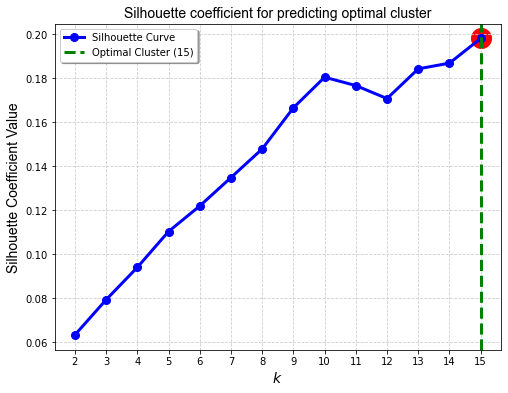

In [17]:
rcParams['figure.figsize'] = 8,6 
plt.plot(range(2,16), silhouette_ave, "bo-", color = 'blue', linewidth = 3, markersize = 8, label = 'Silhouette Curve')
plt.xlabel("$k$", fontsize = 14, family = 'Arial')
plt.ylabel("Silhouette Coefficient Value", fontsize = 14, family = 'Arial')
plt.grid(which='major', color = '#cccccc', linestyle = '--')

plt.title('Silhouette coefficient for predicting optimal cluster', family = 'Arial', fontsize = 14)

k = np.argmax(silhouette_ave) + 2

plt.axvline(x = k, linestyle = '--', c = 'green', linewidth = 3, label = 'Optimal Cluster ({})'.format(k))

plt.scatter(k, silhouette_ave[k-2], c = 'red', s = 400)
plt.legend(shadow = True)

plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])


#plt.savefig('cosineee silhouette score.png', dpi=300)

plt.show()

In [18]:
KMeansCosine = KMeans(n_clusters = 15, 
                      init = 'k-means++', 
                      max_iter = 100, n_init = 10, 
                      random_state = 42)
y_KMeansCosine = KMeansCosine.fit_predict(Y)
silhouettecosine = silhouette_score(Y, y_KMeansCosine, metric = 'cosine')
print(round(silhouettecosine, 4))

0.1981


**B. Menggunakan Metode Silhouette Coefficient (Euclidean Distance)**

In [19]:
silhouette_av = []
for i in range(2,16): 
    kMeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 42)
    y_kMeans = kMeans.fit_predict(Y)
    silhouette_average = silhouette_score(Y, y_kMeans, metric = 'euclidean')
    silhouette_av.append(round(silhouette_average, 4))

In [20]:
print(silhouette_av)

[0.0368, 0.0463, 0.0542, 0.0635, 0.0711, 0.0783, 0.0862, 0.0973, 0.1054, 0.1037, 0.1001, 0.1081, 0.1102, 0.1181]


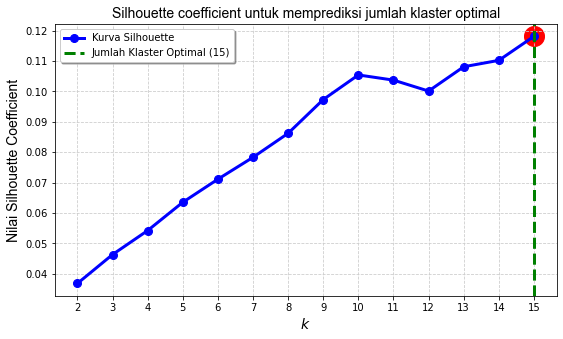

In [21]:
rcParams['figure.figsize'] = 9,5 
plt.plot(range(2,16), silhouette_av, "bo-", color = 'blue', linewidth = 3, markersize = 8, label = 'Kurva Silhouette')
plt.xlabel("$k$", fontsize = 14, family = 'Arial')
plt.ylabel("Nilai Silhouette Coefficient", fontsize = 14, family = 'Arial')
plt.grid(which='major', color = '#cccccc', linestyle = '--')

plt.title('Silhouette coefficient untuk memprediksi jumlah klaster optimal', family = 'Arial', fontsize = 14)

k = np.argmax(silhouette_ave) + 2

plt.axvline(x = k, linestyle = '--', c = 'green', linewidth = 3, label = 'Jumlah Klaster Optimal ({})'.format(k))

plt.scatter(k, silhouette_av[k-2], c = 'red', s = 400)
plt.legend(shadow = True)

plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])


#plt.savefig('cosine silhouette score.png', dpi=300)

plt.show()

In [22]:
KMeansEuclid = KMeans(n_clusters = 15, 
                      init = 'k-means++', 
                      max_iter = 100, n_init = 10, 
                      random_state = 42)
y_KMeansEuclid = KMeansEuclid.fit_predict(Y)
silhouetteeuclid = silhouette_score(Y, y_KMeansEuclid, metric = 'euclidean')
print(round(silhouetteeuclid, 4))

0.1181


**C. Menggunakan Metode Elbow (Euclidean Distance)**

In [23]:
sse = []
for i in range(2,16): 
    km = KMeans(n_clusters = i, 
                init = 'k-means++', 
                max_iter = 100, 
                n_init = 10, 
                random_state = 42)
    y_km = km.fit_predict(Y)
    inertia = km.inertia_
    sse.append(round(inertia, 4))

In [24]:
print(sse)

[451.6376, 438.178, 426.9913, 417.4011, 407.9702, 402.8027, 389.8395, 380.9679, 373.5458, 370.7104, 364.6904, 357.4961, 352.5107, 346.2964]


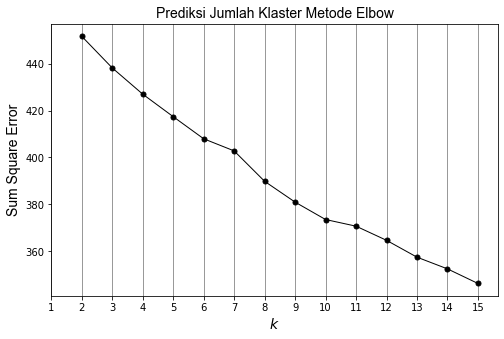

In [25]:
rcParams['figure.figsize'] = 8,5 

plt.plot(range(2,16), sse, linewidth = 1, color = 'black', marker = 'o', markersize = 5)
plt.title('Prediksi Jumlah Klaster Metode Elbow', family = 'Arial', fontsize = 14, color = 'black')
plt.xlabel('$k$', family = 'Arial', fontsize = 14, color = 'black')
plt.ylabel('Sum Square Error', family = 'Arial', fontsize = 14, color = 'black')

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])



plt.grid(which = 'both', color = 'black', axis = 'x', alpha = 0.5)


#plt.savefig('euclidean elbow.png', dpi=300)

plt.show()

In [26]:
KMeansElbow = KMeans(n_clusters = 3, 
                init = 'k-means++', 
                max_iter = 100, 
                n_init = 10, 
                random_state = 42)
y_KMeansElbow = KMeansElbow.fit_predict(Y)

In [29]:
KMeansElbow.inertia_

438.1779565208086

**C. Penilaian dengan Metode Davies Bouldin Index**

In [30]:
from sklearn.metrics import davies_bouldin_score

In [31]:
# nilai DBI untuk Silhouette Cosine 

dbi_scc = davies_bouldin_score(Y.toarray(), y_KMeansCosine)
print(dbi_scc)

2.926277976045938


In [32]:
# nilai DBI untuk Silhouette Euclidean 

dbi_sce = davies_bouldin_score(Y.toarray(), y_KMeansEuclid)
print(dbi_scc)

2.926277976045938


In [33]:
# nilai DBI untuk Elbow

dbi_elb = davies_bouldin_score(Y.toarray(), y_KMeansElbow)
print(dbi_elb)

3.3792778589313257


# 3. Kepadatan Klaster 

In [34]:
from yellowbrick.cluster import SilhouetteVisualizer

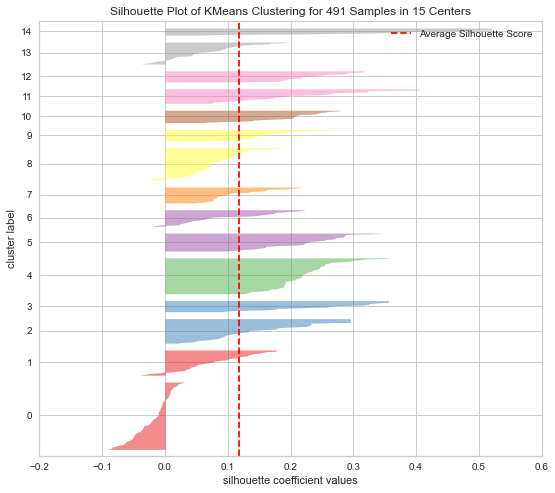

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 491 Samples in 15 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
# Instantiate the clustering model and visualizer

rcParams['figure.figsize'] = 9,8 
visualizer = SilhouetteVisualizer(KMeans(n_clusters = 15, 
                                         init = 'k-means++', 
                                         max_iter = 100, 
                                         n_init = 10, 
                                         random_state = 42))

visualizer.fit(Y)
visualizer.poof()

# 4. Jenis Konten yang Ditemukan 

In [36]:
# print kemunculan kata terbanyak dari tiap klaster

print("Kata dengan Kemunculan Terbanyak di tiap Klaster:\n")
order_centroids = KMeansCosine.cluster_centers_.argsort()[:, ::-1]
terms = counter.get_feature_names()
for i in range(15):
    print ("Klaster %i:" % i, end='')
    for ind in order_centroids[i, :7]:
        print (' %s,' % terms[ind], end='')
    print ("")

Kata dengan Kemunculan Terbanyak di tiap Klaster:

Klaster 0: bliblimart, nikizefanya, beli, pria, diskopop, menang, properday,
Klaster 1: bliblibelanjaseru, berburuhepi, produk, tebak, cari, clue, promo,
Klaster 2: bliblihisteria, belanja, bliblilelang, cashback, checkout, aerox, yamaha,
Klaster 3: bagi, hepi, anniversary, kencanbareng, streaming, hadiah, live,
Klaster 4: electronic, emoticonday, discount, promotion, promo, diskon, printer,
Klaster 5: retweet, like, funwithblibli, follow, tweet, reply, hashtag,
Klaster 6: harga, murah, dompet, wanita, idam, primadona, diskon,
Klaster 7: diskon, ekstra, bliblibelanjaseru, produk, kamera, promo, canon,
Klaster 8: bliblikam, kamera, diskon, promo, preorder, instax, sony,
Klaster 9: blibliintips, tips, live, tonton, outfit, inspirasi, bisnis,
Klaster 10: bliblidgt, tagih, kuota, internet, indosat, cashback, diskon,
Klaster 11: histeriabarengpsj, parkseojun, bliblihisteria, fansparty, brandambassador, ramai, umum,
Klaster 12: akulovediriku

In [37]:
# ingin mengetahui kepadatan klaster 

samples = silhouette_samples(Y, y_KMeansCosine, metric = 'cosine')

silhouette_mean = []
for i in range(15):
    silhouette_cluster = samples[y_KMeansCosine == i]
    mean = np.mean(silhouette_cluster)
    silhouette_mean.append(round(mean, 4))
silhouette_mean

[-0.0405,
 0.1302,
 0.2524,
 0.3975,
 0.3836,
 0.3734,
 0.1512,
 0.206,
 0.1377,
 0.2893,
 0.3181,
 0.3468,
 0.3888,
 0.0994,
 0.5039]

# 5. Prioritas Jenis Konten yang Harus Difokuskan oleh Blibli Indonesia

In [38]:
alltweets = data['text']
alltweets 

0                               parkseojun histeriabarengpsj live streaming parkseojun
1      bagi galaxy follow hitung gambar reply hashtag retweet like tweet funwithblibli
2                                              follow retweet like tweet funwithblibli
3                                        army giveaway samsung galaxy buds bts edition
4                                laptop gratis funwithblibli retweet like tweet laptop
                                            ...                                       
486                 emoticonday electronic promotion discount smartwatch suunto diskon
487                                                   kredivo belanja bliblimart hemat
488                             emoticonday electronic promotion discount kamera canon
489                              emoticonday electronic promotion discount airpurifier
490                                             cashback tagih listrik hemat bliblidgt
Name: text, Length: 491, dtype: object

In [39]:
# select rt 

RT = data['retweetCount']
RT

0      558
1      455
2      278
3      196
4      188
      ... 
486      0
487      0
488      0
489      0
490      0
Name: retweetCount, Length: 491, dtype: int64

In [40]:
# select fav 

FAV = data['favoriteCount']
FAV 

0      6799
1       541
2       310
3       272
4       224
       ... 
486       1
487       1
488       1
489       1
490       1
Name: favoriteCount, Length: 491, dtype: int64

In [41]:
# dataframe 

results = pd.DataFrame({
    'Tweets' : alltweets,
    'Cluster' : y_KMeansCosine,
    'Retweet' : RT,
    'Likes' : FAV
})
results

,Tweets,Cluster,Retweet,Likes
0,parkseojun histeriabarengpsj live streaming parkseojun,11,558,6799
1,bagi galaxy follow hitung gambar reply hashtag retweet like tweet funwithblibli,5,455,541
2,follow retweet like tweet funwithblibli,5,278,310
3,army giveaway samsung galaxy buds bts edition,14,196,272
4,laptop gratis funwithblibli retweet like tweet laptop,5,188,224
...,...,...,...,...
486,emoticonday electronic promotion discount smartwatch suunto diskon,4,0,1
487,kredivo belanja bliblimart hemat,0,0,1
488,emoticonday electronic promotion discount kamera canon,4,0,1
489,emoticonday electronic promotion discount airpurifier,4,0,1


In [43]:
# value counts 

results.Cluster.value_counts()

0     101
4      54
8      49
1      38
2      37
13     33
5      27
6      25
7      24
11     22
10     19
12     17
9      17
3      17
14     11
Name: Cluster, dtype: int64

In [52]:
# setting display ajaa 

pd.set_option('display.precision', 3)

In [41]:
df = results.groupby('Cluster').mean()
df

,Retweet,Likes
Cluster,,
0,5.634,12.188
1,3.395,7.553
2,8.216,230.162
3,26.529,359.294
4,1.093,4.241
5,126.444,135.593
6,2.600,6.160
7,2.542,6.750
8,1.510,6.224


In [42]:
df.sort_values(['Retweet', 'Likes'], ascending = False)

,Retweet,Likes
Cluster,,
5,126.444,135.593
11,50.409,558.364
14,38.455,60.182
3,26.529,359.294
13,11.636,26.788
2,8.216,230.162
12,7.353,32.882
0,5.634,12.188
1,3.395,7.553


In [43]:
meanrt = df.loc[:, 'Retweet']
meanfav = df.loc[:, 'Likes']

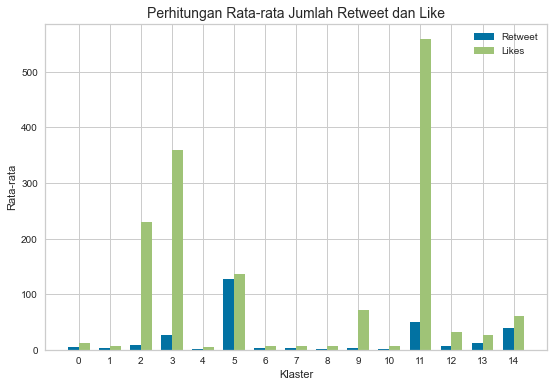

In [44]:
rcParams['figure.figsize'] = 9,6 

labels = range(0,15)
rt_means = meanrt
fav_means = meanfav

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rt_means, width, label='Retweet')
rects2 = ax.bar(x + width/2, fav_means, width, label='Likes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Klaster')
ax.set_ylabel('Rata-rata')
ax.set_title('Perhitungan Rata-rata Jumlah Retweet dan Like', fontsize = 14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


#plt.savefig('Perhitungan retweet likes.png', dpi=300)
plt.show()

# 6. Visualisasi WordCloud

In [45]:
from wordcloud import WordCloud

In [46]:
# wordcloud untuk klaster 14

filters = results['Cluster'] == 14
Cluster14 = results.loc[filters]
Cluster14

,Tweets,Cluster,Retweet,Likes
3,army giveaway samsung galaxy buds bts edition,14,196,272
28,army army bagi hepi giveaway samsung galaxy buds bts edition,14,72,100
29,army giveaway bagi hepi samsung galaxy buds bts edition,14,70,89
46,army preorder samsung galaxy buds bts edition,14,37,80
63,samsung galaxy buds bts edition,14,14,26
73,baca tweet army,14,10,24
94,army,14,6,18
98,hepi senang ultah giveaway army,14,6,12
127,army preorder samsung galaxy,14,4,17
128,army preorder samsung galaxy buds bts edition,14,4,17


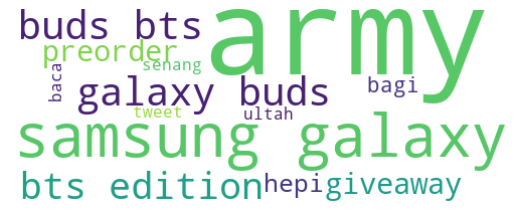

In [47]:
allwords = ' '.join([kata for kata in Cluster14['Tweets']])
wcloud = WordCloud(
    width = 500, 
    height = 200, 
    random_state = 42, 
    background_color = "white", 
    max_font_size = 119).generate(allwords)
plt.imshow(wcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

#plt.savefig('cluster 0.png', dpi=300)